# Introduction to Linear Regression


In [51]:
# Load up Numpy and Matplotlib for visualisation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
np.random.seed(1919)

## Linear Regression

In [52]:
# Generate numPoints random uniform points 
m = 1000
X = 2.0 * np.random.rand(m)
#The y values are the equation y = 4 + 3x plus some noise
y = 4.0 + 3.0 * X + np.random.randn(m) 

In [53]:
y.shape

(1000,)

In [54]:
X = X.reshape(m,1)

In [55]:
X.shape

(1000, 1)

In [56]:
y.shape

(1000,)

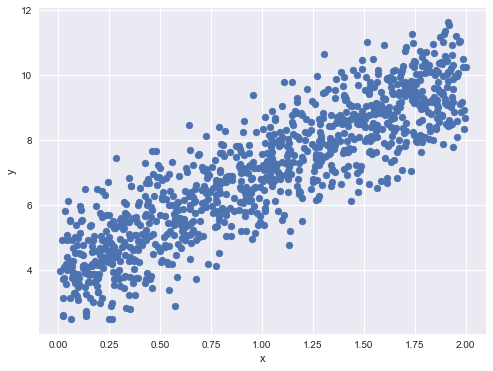

In [57]:
# Plot these on a scatter plot
plt.figure(figsize=(8, 6))
plt.xlabel('x')
plt.ylabel('y') 
plt.scatter(X,y); # semi-colon suppresses output
plt.savefig("Notebook_06_Fig1.png")

In [58]:
# Solve theoretically by first creating a matrix with 1s in first column and x in second
X_b = np.c_[np.ones((m,1)),X]
# Solve for the parameters to see if we get 4 and 3
theta_ols = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_ols

array([3.95095971, 3.04169499])

Text(0, 0.5, 'y')

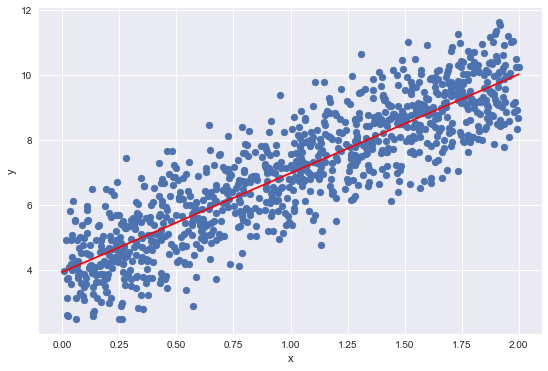

In [59]:
# Plot the data with a line through it for x = 0 and x = 2
plt.figure(figsize=(9, 6))
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_ols)
plt.plot(X_new,y_predict,'r-')
plt.scatter(X,y);
plt.xlabel('x')
plt.ylabel('y') 

## Using Scikit Learn to do same thing

In [60]:
n=1

In [61]:
X.shape

(1000, 1)

In [62]:
X = X.reshape(m,n)

In [63]:
X.shape

(1000, 1)

In [64]:
y.shape

(1000,)

In [65]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
# This time x is just a column of values 
regr.fit(X,y)

LinearRegression()

In [66]:
# The algorithm needs to use the intercept
print('Intercept:', regr.intercept_, 'Coefficients:', regr.coef_)

Intercept: 3.950959705906266 Coefficients: [3.04169499]


In [67]:
y_pred = regr.predict(X)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %15.3f" % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction 
print('R squared: %5.2f' % r2_score(y, y_pred))

Mean squared error:           0.919
R squared:  0.77


## Two Features

In [69]:
m = 100

In [70]:
# Generate numPoints random uniform points 
x1 = 2.0 * np.random.rand(m)
x2 = 2.0 * np.random.rand(m)
y_2 = 4.0 + 3.0 * x1 - 6.0 * x2 + np.random.randn(m) 

In [71]:
# Solve theoretically by first creating a matrix with 1s in first column and x in second
X_2 = np.c_[x1,x2]

In [72]:
regr.fit(X_2,y_2)

LinearRegression()

In [73]:
# The algorithm needs to use the intercept
print('Intercept:', regr.intercept_, 'Coefficients:', regr.coef_)

Intercept: 4.183369393920772 Coefficients: [ 2.87548152 -6.08938715]


In [74]:
y_2_pred = regr.predict(X_2)

In [75]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_2, y_2_pred))
# Explained variance score: 1 is perfect prediction 
print('R squared: %.2f' % r2_score(y_2, y_2_pred))

Mean squared error: 0.95
R squared: 0.95
